## MultiTree objects
Toytree supports the use of MultiTree (`mtree`) objects to store lists of linked trees, such as bootstrap replicates or trees sampled from a posterior distribution. MultiTree objects can be generated from a list of Toytrees or newick strings, or by parsing a file, url, or string of text that includes newick trees separated by newlines. 

In [1]:
import toytree
import toyplot
import numpy as np

### Parsing data into MultiTree objects

An example string or file representing multiple trees as newick strings:

In [2]:
string = """\
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):1,c:3);
(((a:1,d:1):1,(b:1,e:1):1):1,c:3);
(((a:1.5,b:1.5):1,(d:1,e:1):1.5):1,c:3.5);
(((a:1.25,b:1.25):0.75,(d:1,e:1):1):1,c:3);
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):1,c:3);
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):2,c:4);
(((a:1.5,b:1.5):0.5,(d:1,e:1):1):1,c:3);
(((b:1.5,d:1.5):0.5,(a:1,e:1):1):1,c:3);
"""

Create a MultiTree object by passing the input data to `toytree.mtree()`. The `treelist` attribute of `mtree` objects provides a list of the trees in it. These can be indexed and accessed or manipulated like any normal `ToyTree` class object. 

In [3]:
# create an mtree from a string, list of strings, url, or file.
mtre0 = toytree.mtree(string)

# access the treelist
mtre0.treelist

In [4]:
# create an mtree object from a list of ToyTrees (can be sliced like any list)
mtre1 = toytree.mtree(mtre0.treelist[:5])

# access the treelist
mtre1.treelist

### Consensus trees from multitrees

Before we get into the plotting features of MultiTrees, let's first explore several useful functions that toytree provides for analyzing groups of trees. First, we can infer a majority-rule consensus tree from a group of input topologies. The `.get_consensus_tree` function will return a ToyTree with the consensus topology and clade supports stored on nodes as the "support" feature. 

In [5]:
ctre = mtre0.get_consensus_tree().root('c')
ctre.draw(node_labels='support', use_edge_lengths=False);

a b d e c idx: 5
name: i5
dist: 75
support: 75
height: 100 75 idx: 6
name: i6
dist: 75
support: 75
height: 100 75 idx: 7
name: i7
dist: 50
support: 100
height: 175 100 idx: 8
name: i7
dist: 0
support: 100
height: 225 100

### Accessing trees in a multitree object
You can access each item in a treelist and plot it to examine the variation in topologies individually. Or you can do any other calculations you wish using the underlying ete tree object. Below we iterate over all toytree objects in the treelist and extract the underlying ete TreeNode and pass it to the consensus tree's TreeNode object which has a function to calculate Robinson-Foulds distances. This is a measure of the topological mismatch between the trees. 

In [6]:
# calculate Robinson-Foulds distances between consensus and each individual tree
[ctre.tree.robinson_foulds(i.tree)[0] for i in mtre0.treelist]

[0, 4, 0, 0, 0, 0, 0, 4]

In [7]:
# iterate over treelist and plot each tree on a separate canvas
for tre in mtre0.treelist:
    tre.draw(height=200, width=300);

e d b a c

e b d a c

e d b a c

e d b a c

e d b a c

e d b a c

e d b a c

e a d b c

### TreeGrid plot
A bit simpler still you can use the `TreeGrid` plotting method to make a Canvas of Toytree plots spaced on a grid. A similar plot an be made by using Canvas and Axes arguments, as explained [here](), but this is a quick shortcut for examining a number of trees. 

In [8]:
mtre0.draw_tree_grid(x=2, y=5, start=0, width=700, height=400, edge_type='c');

e d b a c e b d a c e d b a c e d b a c e d b a c e d b a c e d b a c e a d b c

### CloudTree plot
It can be more informative still to plot a number of trees on top of each other. These are sometimes called "densitree" plots, or here, "cloud tree plots". A bit of detail: These can become quite cumbersome inside a jupyter notebook since the underlying HTML of each tree grows large when you plot thousands of trees. For this reason toytree returns cloudtrees in "png" format by default. This simply compacts the information into a bitmap of pixels. You can override it if you wish by using the html=True argument as below. 

In [9]:
# draw cloud tree (here with some extra styling)
c, a = mtre0.draw_cloud_tree(
    orient='right',
    width=300,
    html=True,
    tip_labels=['<b>cloud-tip {}</b>'.format(i) for i in mtre0.get_tip_labels()],
)

cloud-tip e cloud-tip d cloud-tip b cloud-tip a cloud-tip c

Here is an example in "png" format. You can see the only real difference is in the placement of the canvas. Not centered. Otherwise all styling acts the same. The difference between the format used to plot in the notebook does not effect the format you use to store the figure when you save it to disk. You set that format when you save it, e.g., using PDF, SVG, PNG, etc. 

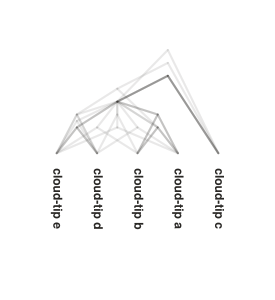

In [10]:
# draw cloud tree in PNG form 
c, a = mtre0.draw_cloud_tree(
    height=300,
    tip_labels=['<b>cloud-tip {}</b>'.format(i) for i in mtre0.get_tip_labels()],
)

### Example: <i>Xiphophorus fishes</i> 
Data set for reconstructing a densitree figure from [Cui et al. (2013)](https://datadryad.org/resource/doi:10.5061/dryad.8bt72/1). I've taken the nexus file from the paper's dryad repository and converted it to newick and saved it online so it can be easily downloaded. The file contains 160 trees representing mrbayes consensus trees inferred for different genomic regions. 

In [11]:
fish = toytree.mtree("https://eaton-lab.org/data/Xiphophorus-160mb-consenstrees.tre")

In [12]:
fish.draw_tree_grid(height=300, width=700, tip_labels_style={"font-size": "8px"});

Xmalinche_CHIC2 Xbirchmanni_GARC Xcortezi Xnezahuacoyotl Xmontezumae Xnigrensis Xmultilineatus Xpygmaeus Xcontinens Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xmeyeri Xgordoni Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Psjonesii Priapella Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xnigrensis Xmultilineatus Xpygmaeus Xcontinens Xmeyeri Xgordoni Xcouchianus Xxiphidium Xvariatus Xandersi Xmilleri Xevelynae Xmaculatus_JpWild Xclemenciae_G Xmonticolus Xsignum Xmayae Xhellerii Xalvarezi Psjonesii Priapella Xmeyeri Xgordoni Xcouchianus Xxiphidium Xandersi Xvariatus Xevelynae Xmilleri Xmaculatus_JpWild Xclemenciae_G Xmonticolus Xmalinche_CHIC2 Xbirchmanni_GARC Xcortezi Xnezahuacoyotl Xmontezumae Xnigrensis Xmultilineatus Xpygmaeus Xcontinens Xmayae Xalvarezi Xsignum Xhellerii Psjonesii Priapella Xnezahuacoyotl Xcortezi Xmalinche_CHIC2 Xbirchmanni_GARC Xmontezumae Xnigrensis Xmultilineatus Xpygmaeus Xcontinens Xmayae Xalvarezi Xsignum Xhellerii Xclemenciae_G Xmonticolus Xxiphidium Xmeyeri Xgordoni Xcouchianus Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Psjonesii Priapella <g class="toyplot-Datum" style="fill:rgb(40%,76.1%,64.7

### Fixed tip order
When plotting cloudtrees the order of names at the tips will be fixed across trees, this is required in order to see disagreement among topologies. For example, we can fix the order across all trees in a multitree object's treelist by setting `fixed_order=True`. This is the default tip order that will be used in cloudtree drawings. The tips are ordered by the order of the consensus tree. With the tip order fixed disagreements among trees are easier to observe. 

In [13]:
consorder = fish.get_consensus_tree().get_tip_labels()
fish.draw_tree_grid(
    height=300, 
    width=700,
    edge_type='c',
    tip_labels_style={"font-size": "9px"},
    fixed_order=consorder,
);

Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii

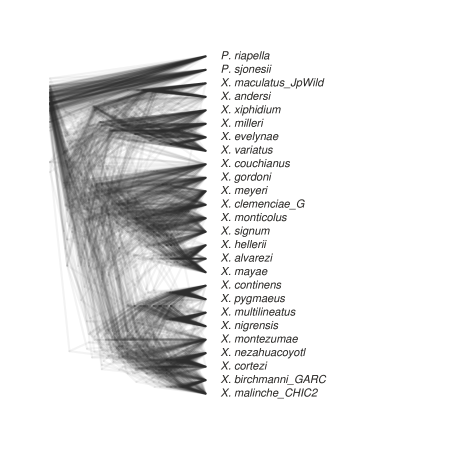

In [14]:
# draw a cloud tree using the default setting fixed_order=True, and additional styling
canvas, axes = fish.draw_cloud_tree(
    height=450, 
    width=450,
    orient='right',
    edge_style={
        'stroke': "#262626",
        'opacity': 0.05,
    },
    tip_labels=[
        "<i>{}. {}</i>".format(i[0], i[1:]) for i in fish.get_tip_labels()],
    tip_labels_style={
        "font-size": "11px",
    }
);

### Custom tip order 
If the `fixed_order` argument is provided as a list of names then tips of the tree will be ordered according to the list. Take note: the structure of the relationships in the tree (e.g., the newick representation) does not change with fixed_order, this is simply changing the order that tips are presented when plotting. For example, the tip order below was used in the published paper by Cui et al. since it shows the geographic distributions of clades nicely ordered from north to south. When entering names as a list the order of names is plotted from bottom (x axis=0) to the top location on a right-facing tree. 

In [15]:
customorder = [
    "Priapella",
    "Psjonesii",
    "Xmayae",
    "Xalvarezi",
    "Xhellerii",
    "Xsignum",
    "Xmonticolus",
    "Xclemenciae_G",
    "Xbirchmanni_GARC",
    "Xmalinche_CHIC2",
    "Xcortezi",
    "Xnezahuacoyotl",
    "Xmontezumae",   
    "Xcontinens",
    "Xpygmaeus",
    "Xmultilineatus",    
    "Xnigrensis",
    "Xgordoni",
    "Xmeyeri",
    "Xcouchianus",
    "Xxiphidium",
    "Xvariatus",
    "Xevelynae",
    "Xmilleri",
    "Xandersi",
    "Xmaculatus_JpWild",
]

In [16]:
# create a new multitree object init with this order
fish.draw_tree_grid(
    height=300, 
    width=700, 
    tip_labels_style={"font-size": "9px"},
    edge_type='c',
    fixed_order=customorder,
);

Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild

### Additional styling
This is shows many additional options, here intended to produce a figure like in the published article.

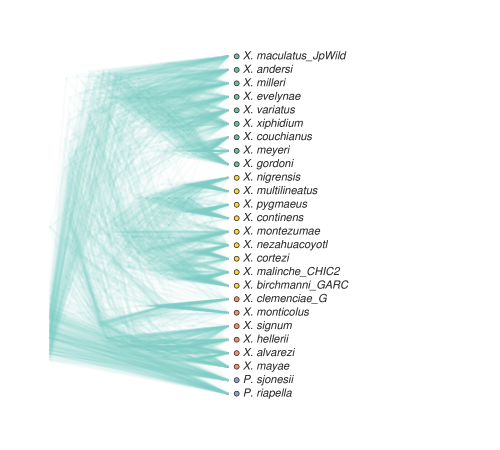

In [17]:
# draw the cloudtree
canvas, axes = fish.draw_cloud_tree(
    fixed_order=customorder,
    height=450, 
    width=500,
    orient='right',
    edge_style={
        'stroke': toyplot.color.brewer.palette("BlueGreen")[4],
        'opacity': 0.05,
    },
    tip_labels=[
        "<i>{}. {}</i>".format(i[0], i[1:]) for i in customorder],
    tip_labels_style={
        "font-size": "11px",
    }
);

# add colored nodes at the tips (x-axis=0) (y-axis=1-ntips)
xlocs = np.zeros(fish.ntips)
ylocs = np.arange(fish.ntips)
colors = np.concatenate([   
    [toytree.colors[2]] * 2,
    [toytree.colors[1]] * 6,
    [toytree.colors[5]] * 9,
    [toytree.colors[0]] * 9,
])
axes.scatterplot(
    xlocs + 0.05, 
    ylocs,
    color=colors,
    mstyle={"stroke": "black", "stroke-width": 0.5},
    size=5,
);

### Save to disk as PDF

In [18]:
# write as PDF
import toyplot.pdf
toyplot.pdf.render(canvas, "fish-cloudtree.pdf")

In [19]:
# write the newick trees to file
fish.write("fish-consenstrees.tre")

### Advanced styling
In this case let's use color mapping to plot different colors for each topology such that the colors tell us additional information about the tree. We'll use the Robinson-Fould's distance between each subtree and the consensus tree to color it. First let's choose a color palette to map the values to. 

In [47]:
# a linear color map 
colormap = toyplot.color.brewer.map("BlueGreen", reverse=True)
colormap

In [48]:
# calculate RF distances for each tree compared to the consensus
fishcons = fish.get_consensus_tree()
rfdists = np.array([
    fishcons.tree.robinson_foulds(i.tree, unrooted_trees=True)[0] 
    for i in fish.treelist
])
print(rfdists[:10], '...')

[10 16 20 14 25 13 18  9 21 20] ...


In [49]:
colors = toyplot.color.broadcast((rfdists, colormap), shape=rfdists.shape)
colors[:10]

array([(0.85228758, 0.94248366, 0.83006536, 1.),
       (0.66823529, 0.8703268 , 0.71398693, 1.),
       (0.48235294, 0.8       , 0.76862745, 1.),
       (0.74352941, 0.89960784, 0.74745098, 1.),
       (0.26013072, 0.65098039, 0.8       , 1.),
       (0.78117647, 0.91424837, 0.76418301, 1.),
       (0.57647059, 0.83555556, 0.7372549 , 1.),
       (0.87320261, 0.95084967, 0.8530719 , 1.),
       (0.43529412, 0.77385621, 0.78431373, 1.),
       (0.48235294, 0.8       , 0.76862745, 1.)],
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

AttributeError: 'list' object has no attribute 'cssdict'

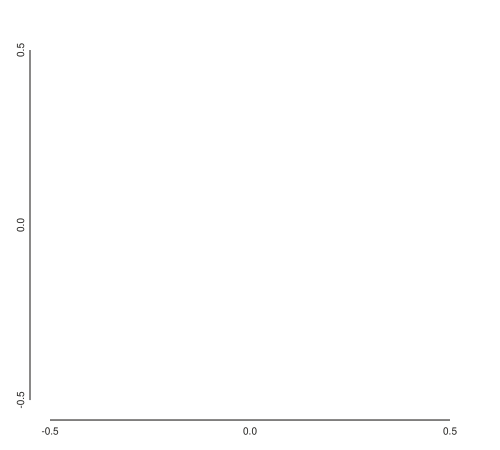

In [26]:
# edge_style as a list of style dictionaries
edicts = [{"stroke": col, "opacity": 0.05} for col in colors]

draw = fish.draw_cloud_tree(
    fixed_order=customorder,
    debug=True,
    height=450, 
    width=500,
    orient='right',
    edge_style=edicts,
    tip_labels=[
        "<i>{}. {}</i>".format(i[0], i[1:]) for i in customorder],
    tip_labels_style={
        "font-size": "11px",
    }
);

In [27]:
draw = toytree.Multitree.CloudTree(fish)

In [53]:
for idx, tre in enumerate(draw.mtree.treelist):
    tre._style.edge_style = colors[idx]

In [56]:
draw.mtree.treelist[0]._style.edge_style

(0.85228758, 0.94248366, 0.83006536, 1.)

### Consensus tree custom ordered
You can order any normal Toytree as well by setting `fixed_order` when initiating the tree. Below I order a consensus tree into a toytree with fixed_order to be the same custom order that we used above. You can see that the Xiphophorus cloud tree above has fairly low agreement across most subtrees. 

In [ ]:
fishcons = fish.get_consensus_tree()
fishcons = toytree.tree(fishcons.newick, fixed_order=customorder)
fishcons.draw(node_labels='support', use_edge_lengths=False);